# Time Series Analysis on Germany’s daily electricity consumption

# Import pandas, numpy & the dataset

In [82]:
import pandas as pd
import numpy as np

In [83]:
df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df_power.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [84]:
df_power.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [85]:
df_power.info

<bound method DataFrame.info of             Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]>

In [86]:
df_power.shape

(4383, 5)

In [87]:
df_power.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [88]:
#convert object to datetime format
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [89]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Now that the Date column is in correct datatype, let’s set it as the DataFrame’s index because in time series analysis the index column is always datetime column.

In [90]:
df_power = df_power.set_index('Date')
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [91]:
df_power.index #index column

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [92]:
# Display a random sampling of 5 rows
df_power.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2008-08-23,1152.011,NaN,NaN,NaN
2013-08-08,1291.984,79.666,93.371,173.037
2009-08-27,1281.057,NaN,NaN,NaN
2015-10-02,1391.050,81.229,160.641,241.870
2009-06-02,1201.522,NaN,NaN,NaN


In [93]:
df_power.loc['2015-08-10']

Consumption    1364.364
Wind             77.203
Solar           149.190
Wind+Solar      226.393
Name: 2015-08-10 00:00:00, dtype: float64

In [94]:
df_power.loc['2017-01-01':'2017-12-30'] #January to December, 2017

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.41300,307.125,35.291,342.416
2017-01-02,1441.05200,295.099,12.479,307.578
2017-01-03,1529.99000,666.173,9.351,675.524
2017-01-04,1553.08300,686.578,12.814,699.392
2017-01-05,1547.23800,261.758,20.797,282.555
...,...,...,...,...
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586


# Visualization

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the pandas's plot() method

<AxesSubplot:xlabel='Date'>

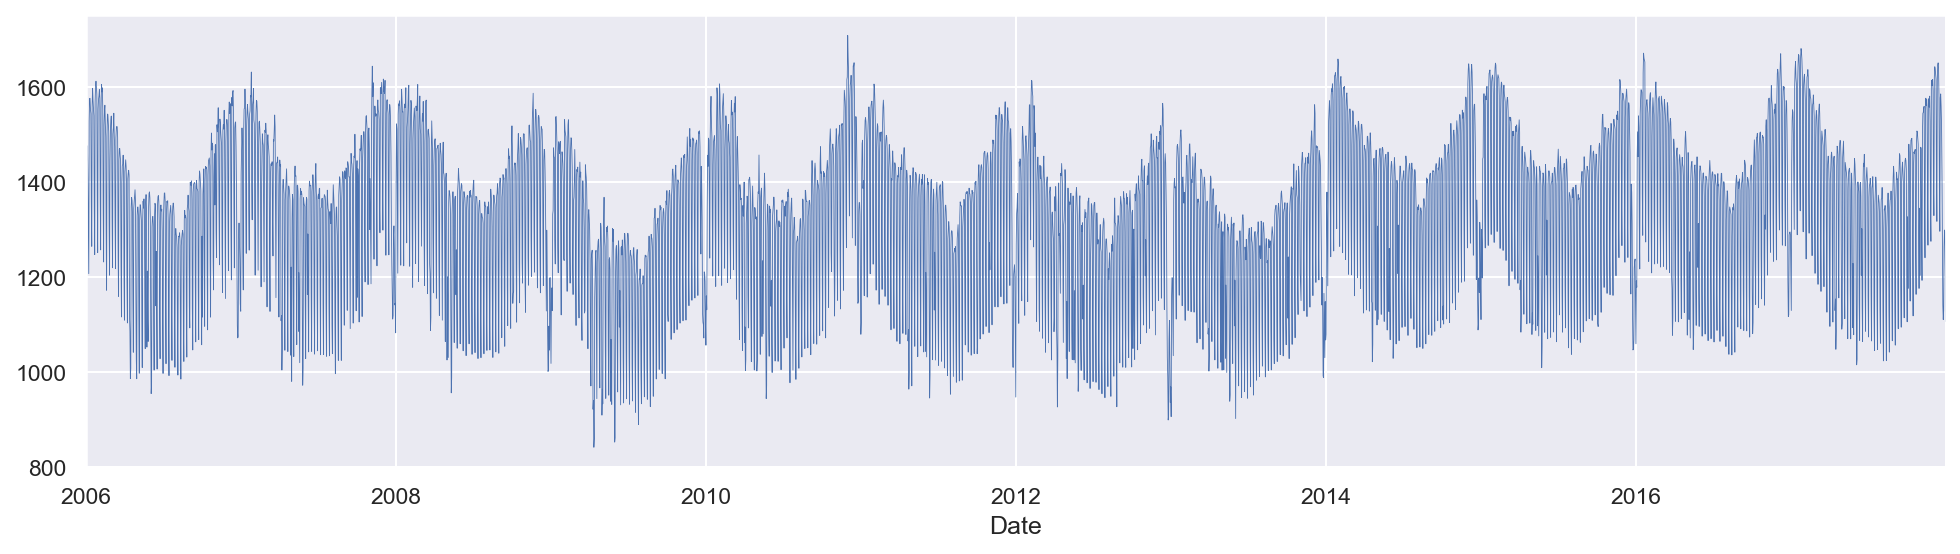

In [96]:
df_power['Consumption'].plot(linewidth=0.4)

<AxesSubplot:xlabel='Date'>

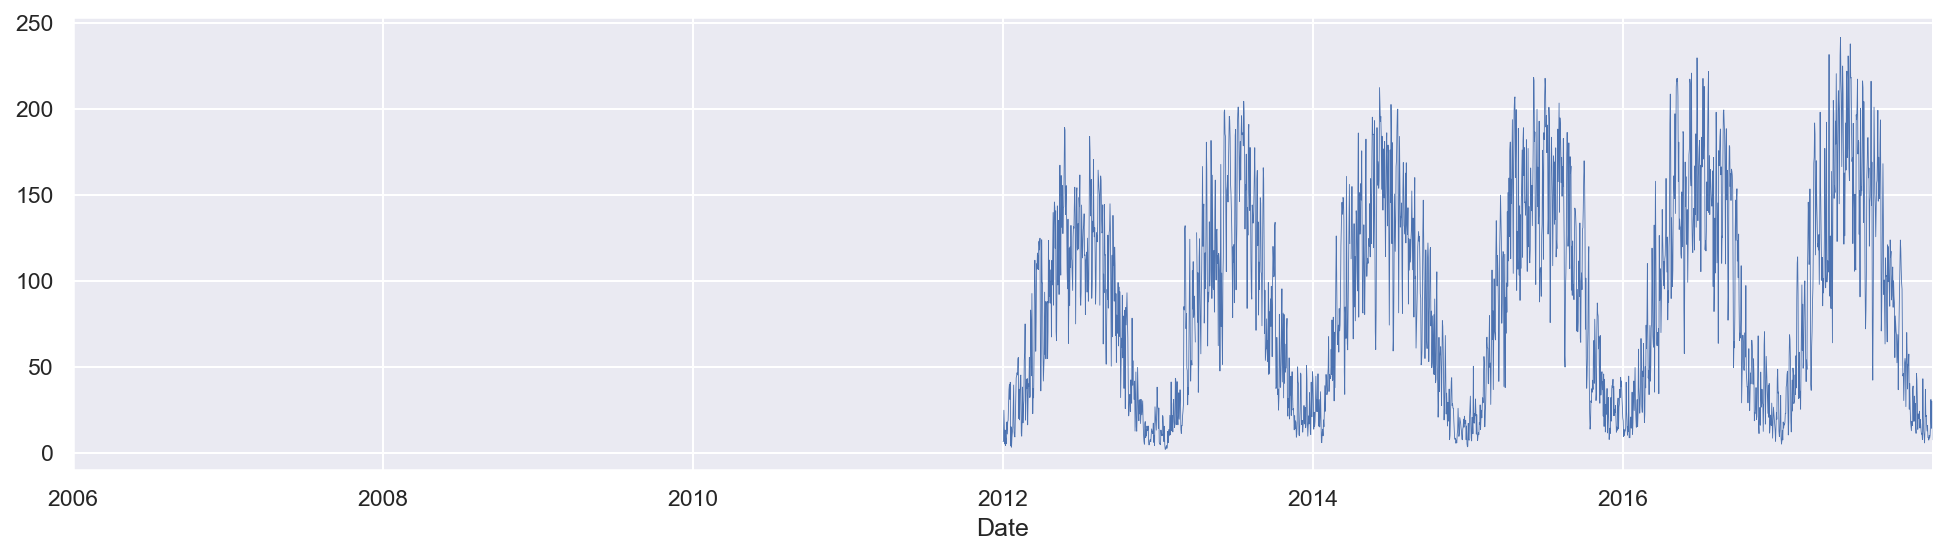

In [97]:
df_power['Solar'].plot(linewidth=0.4)

<AxesSubplot:xlabel='Date'>

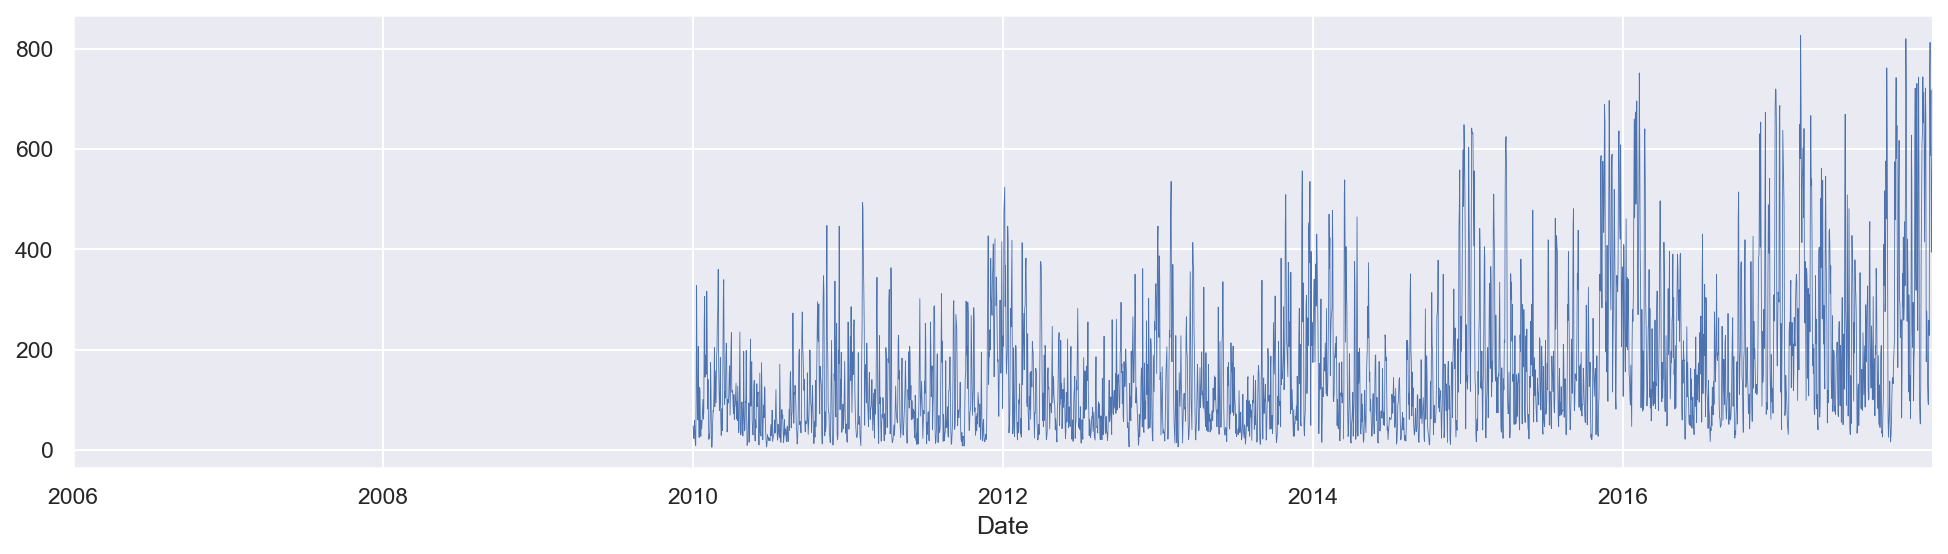

In [98]:
df_power['Wind'].plot(linewidth=0.4)

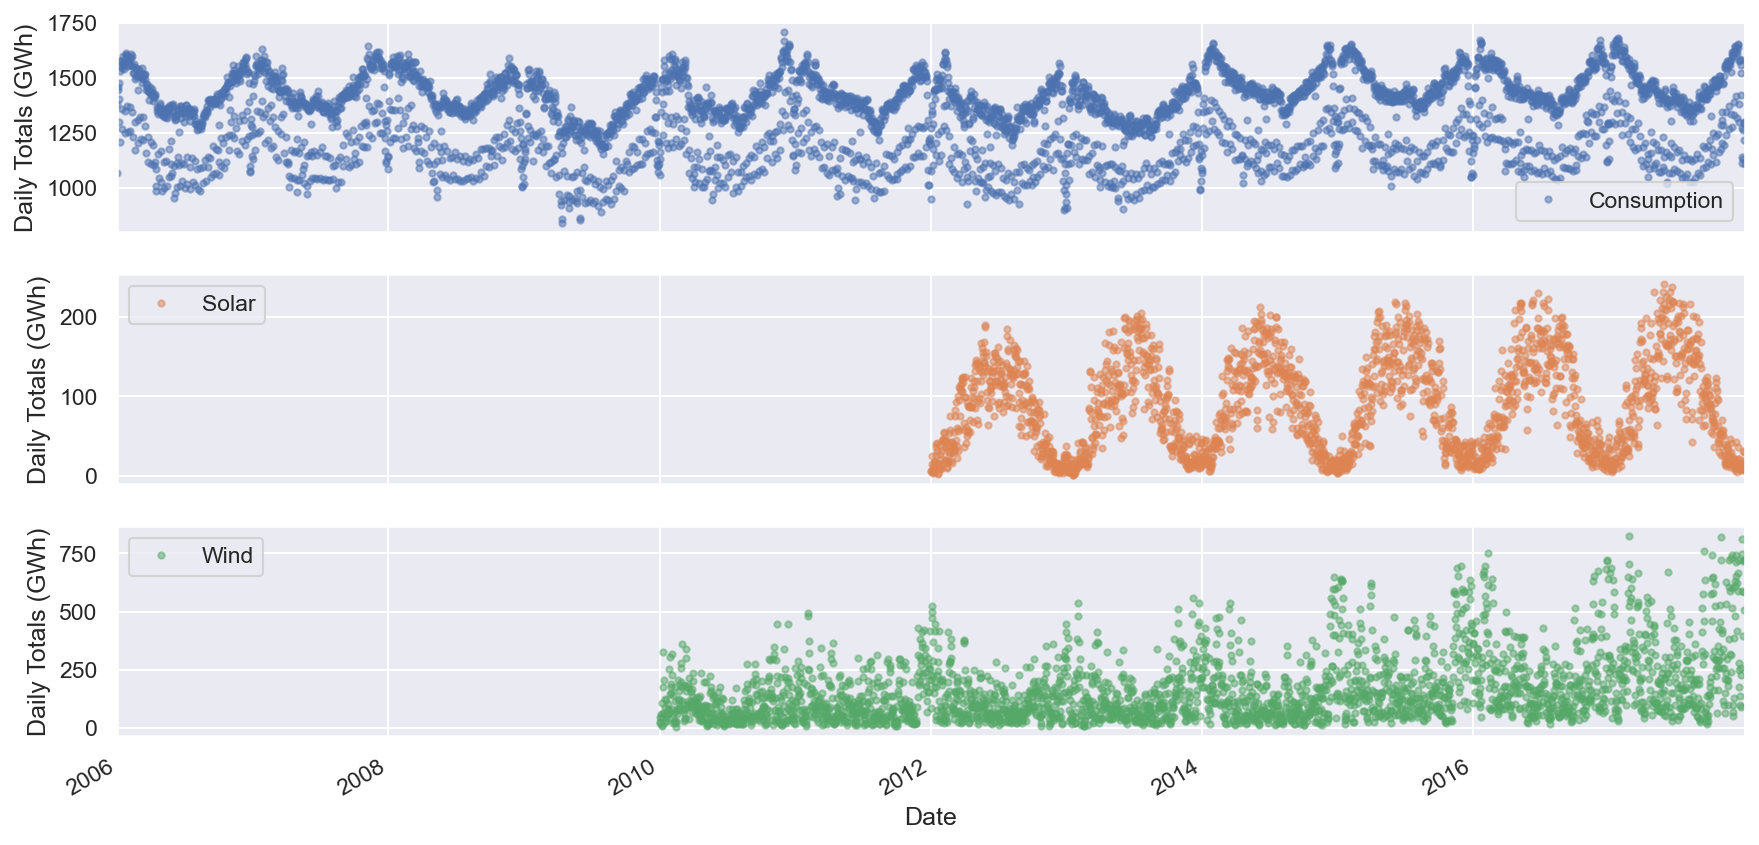

In [99]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

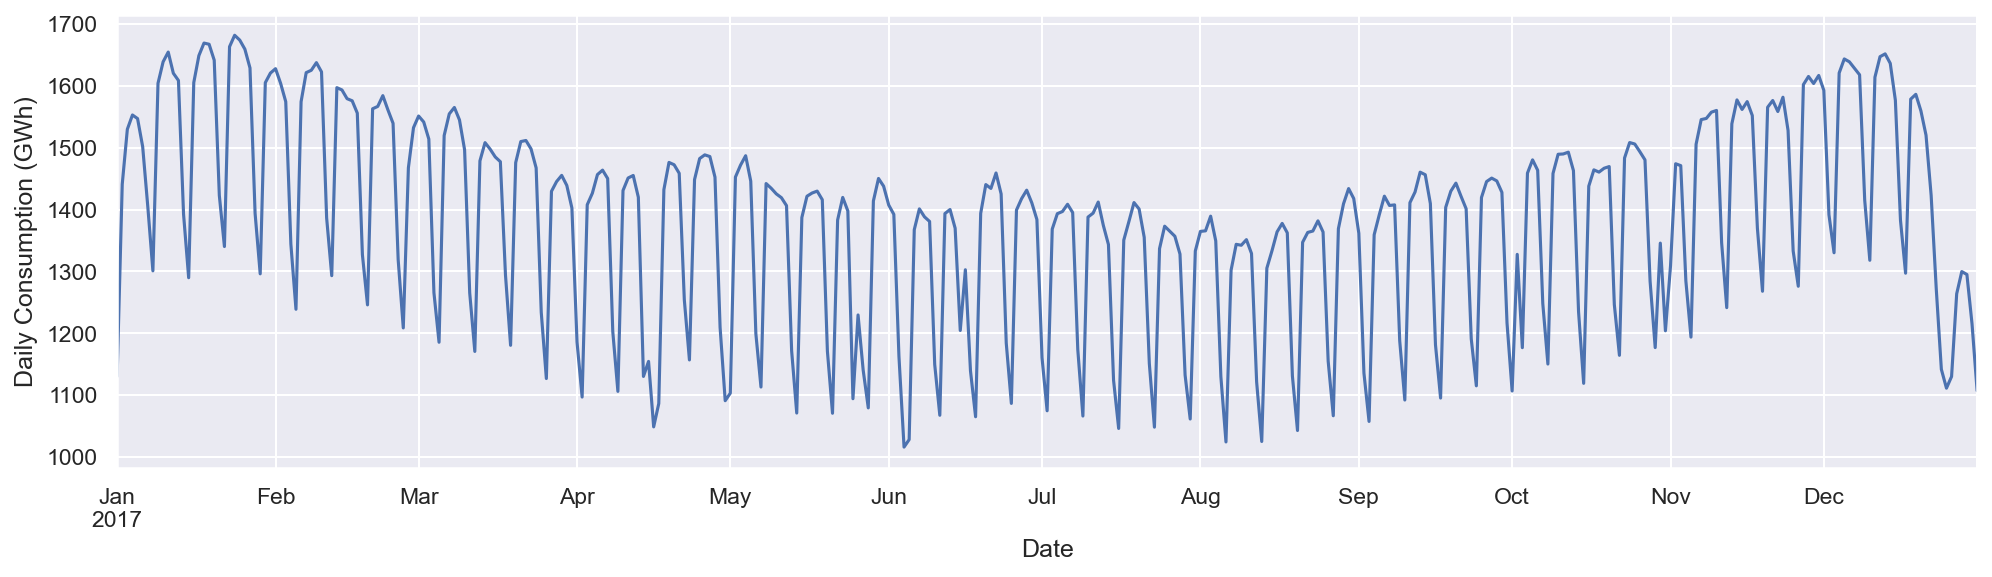

In [100]:
ax = df_power.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

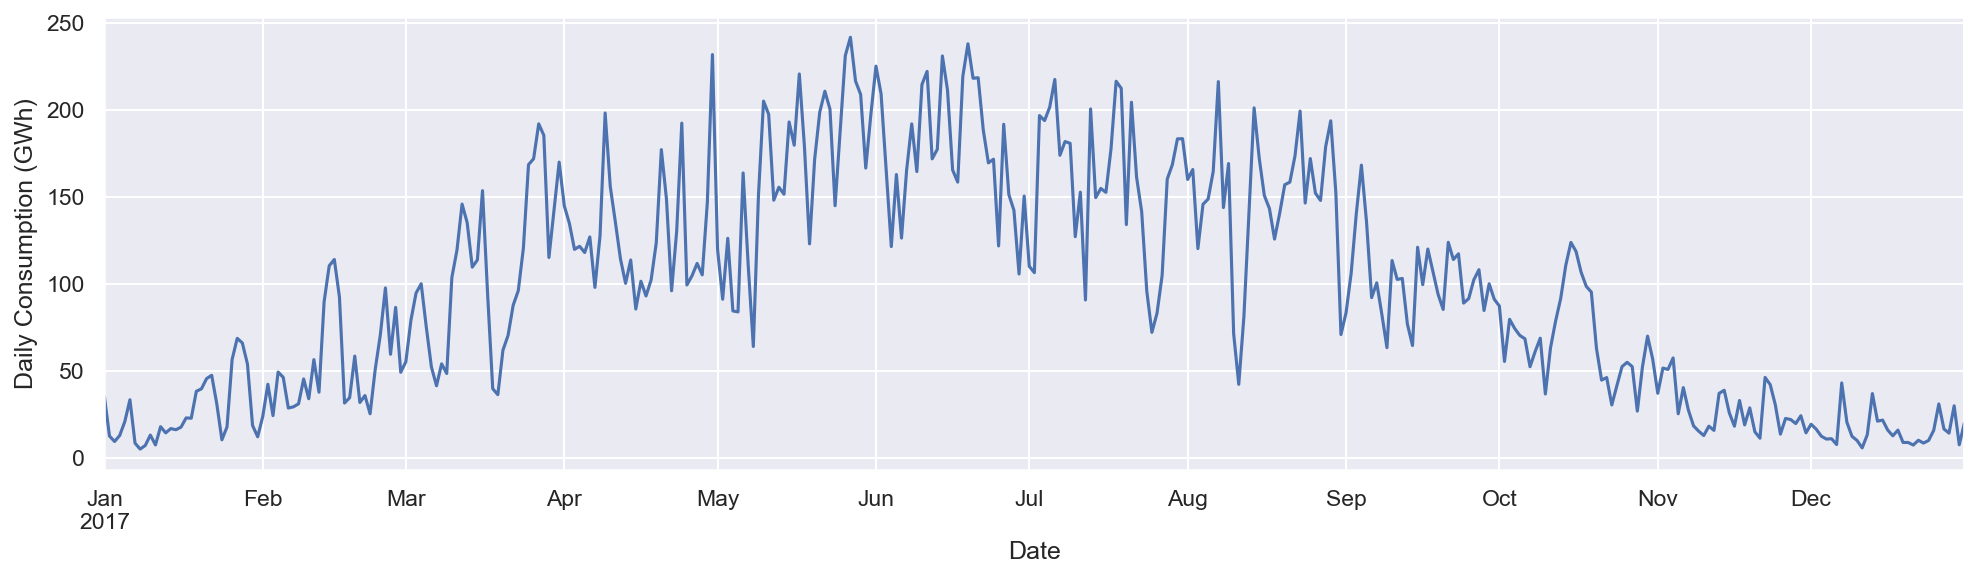

In [101]:
ax = df_power.loc['2017', 'Solar'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

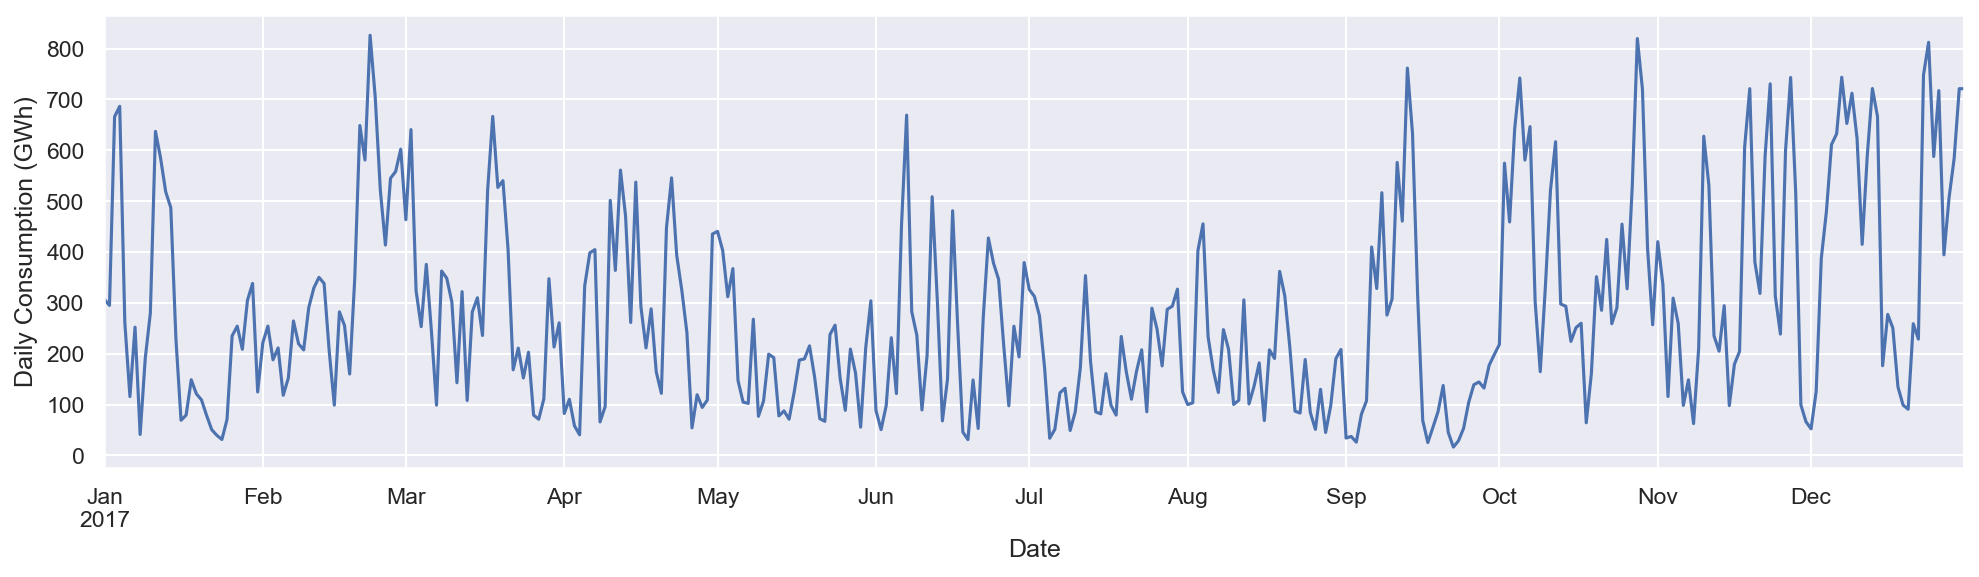

In [102]:
ax = df_power.loc['2017', 'Wind'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

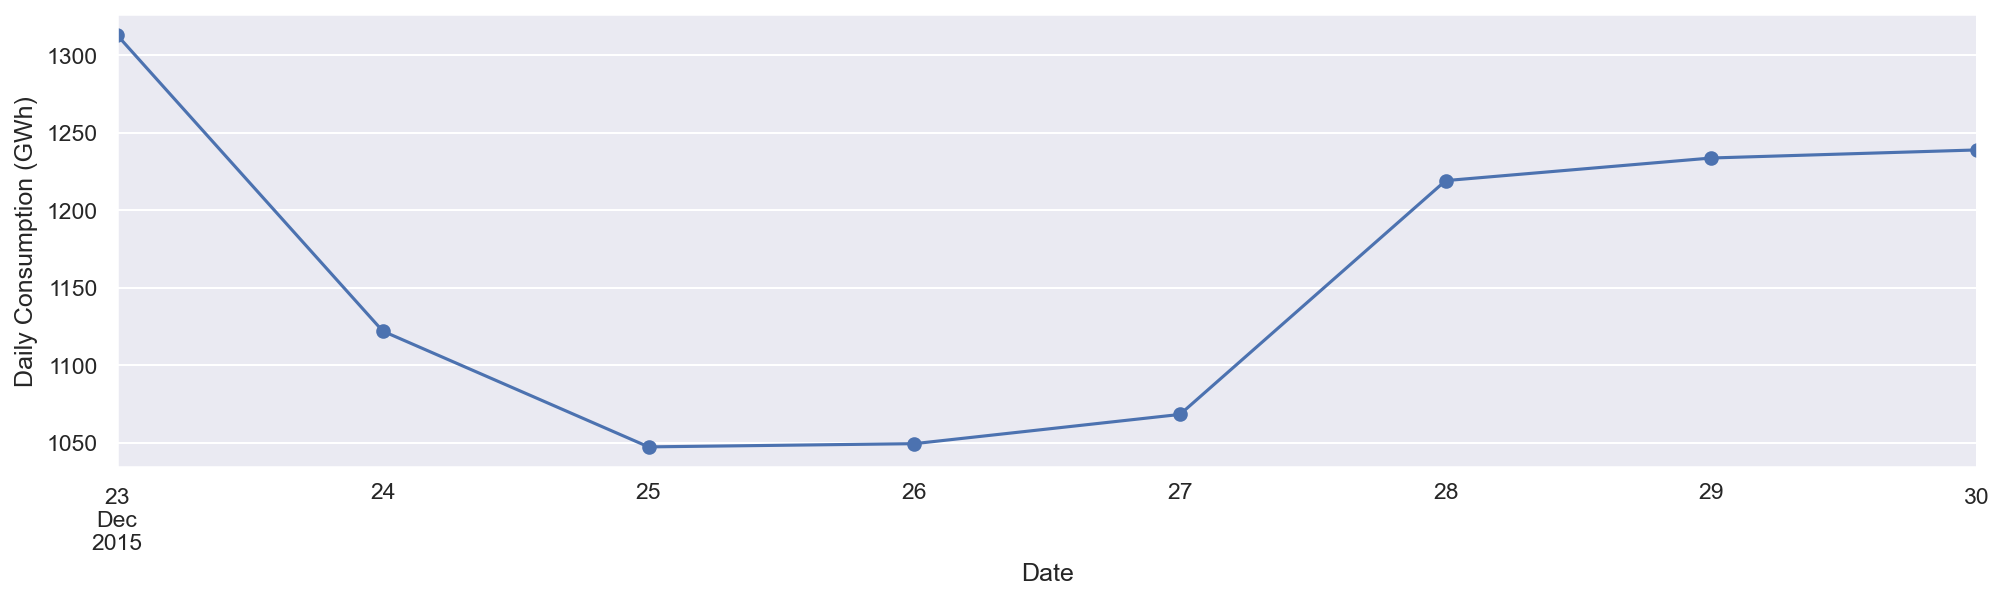

In [103]:
ax = df_power.loc['2015-12-23':'2015-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

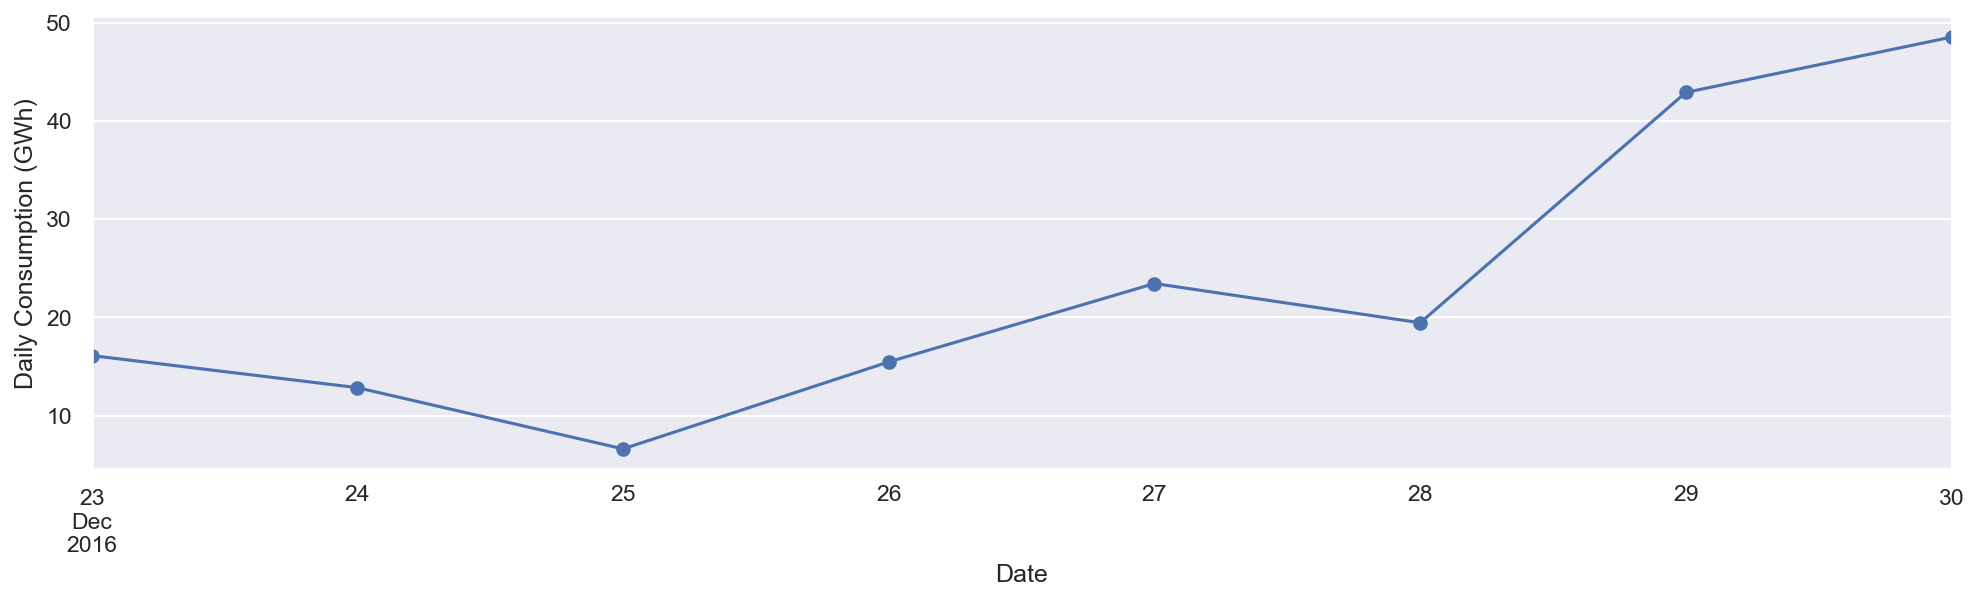

In [104]:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Solar'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

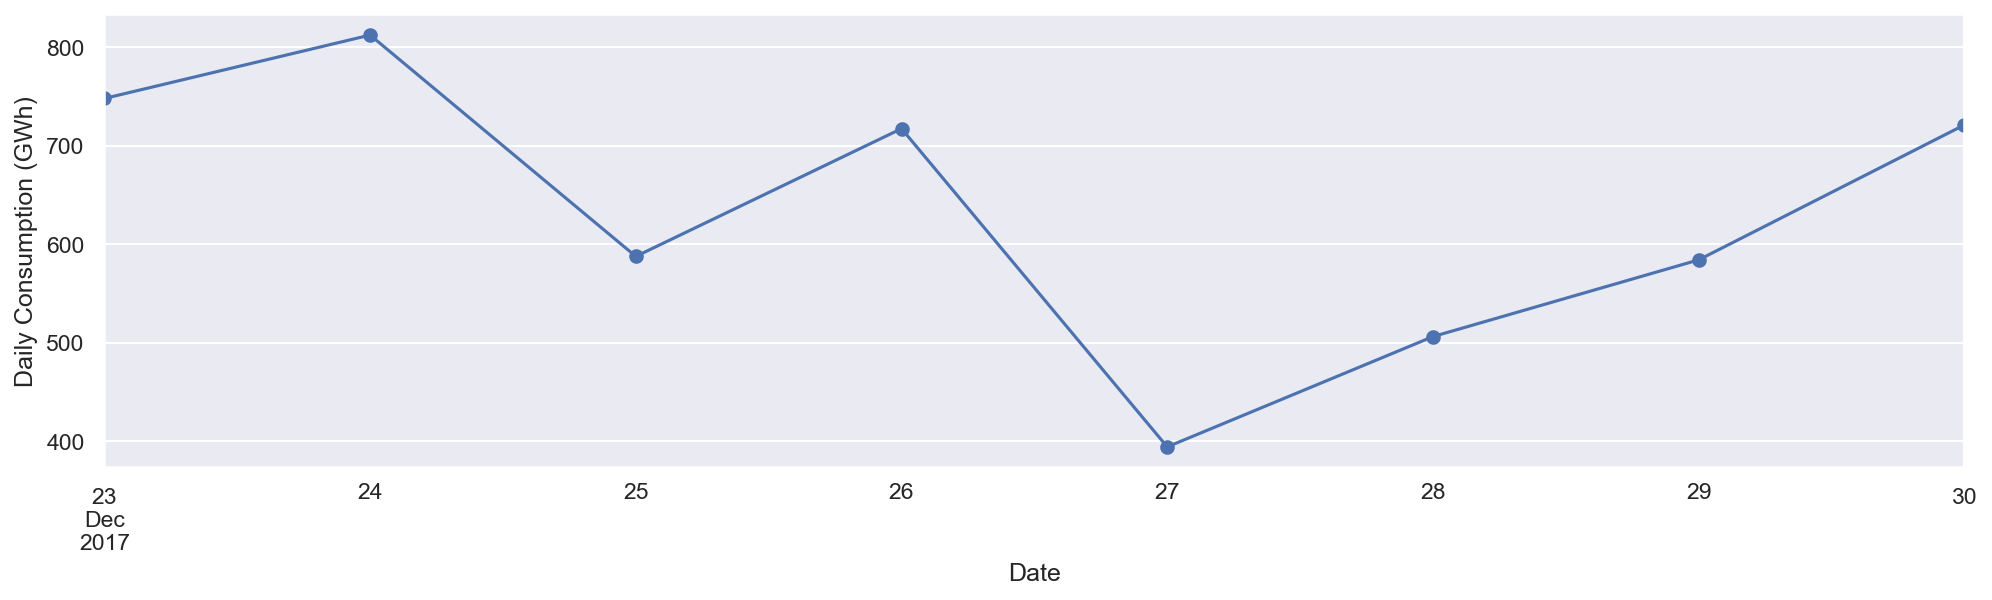

In [105]:
ax = df_power.loc['2017-12-23':'2017-12-30', 'Wind'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

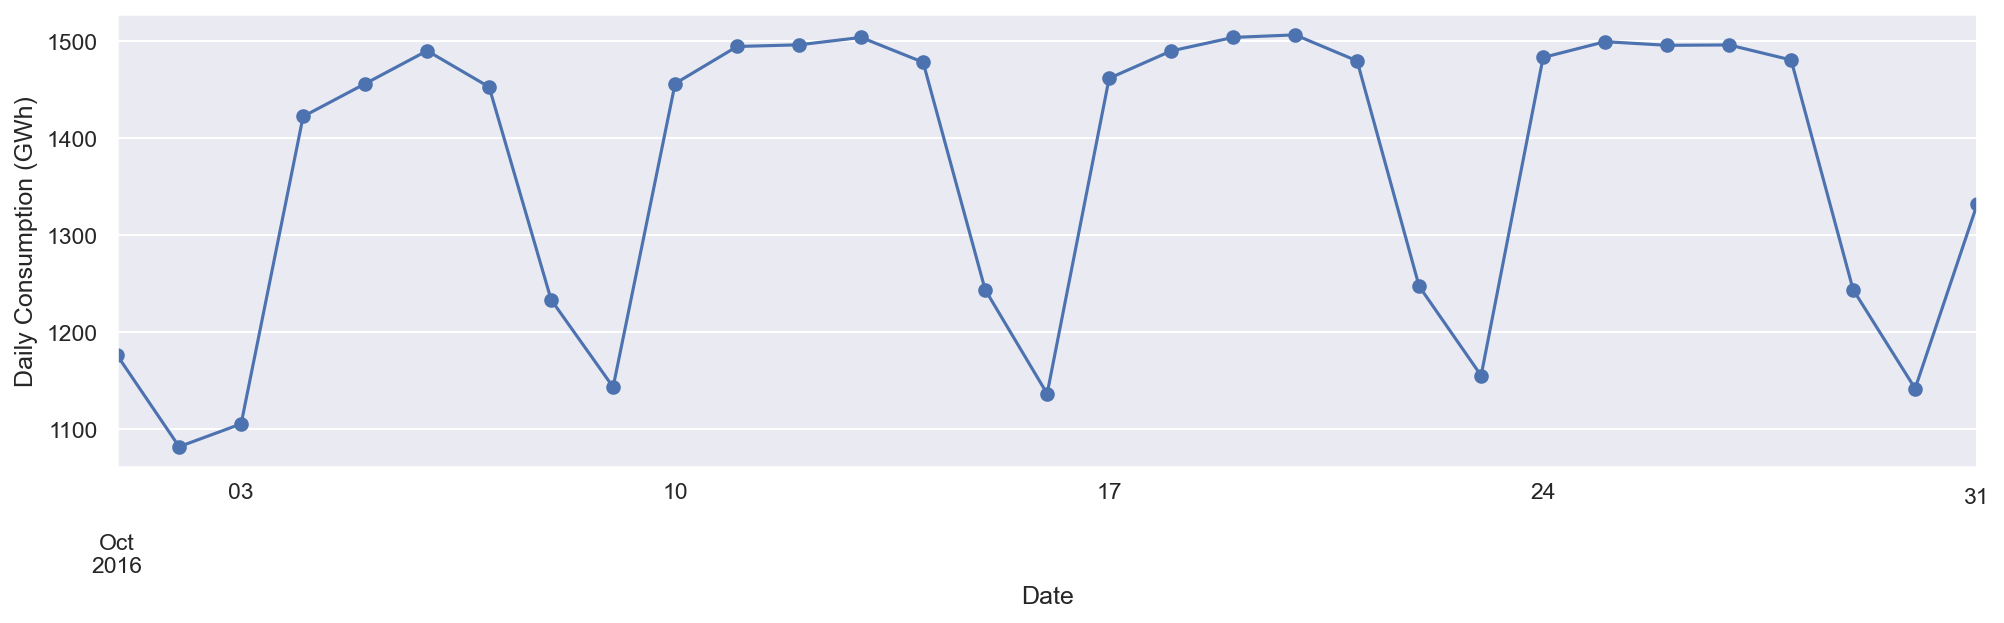

In [106]:
ax = df_power.loc['2016-10', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

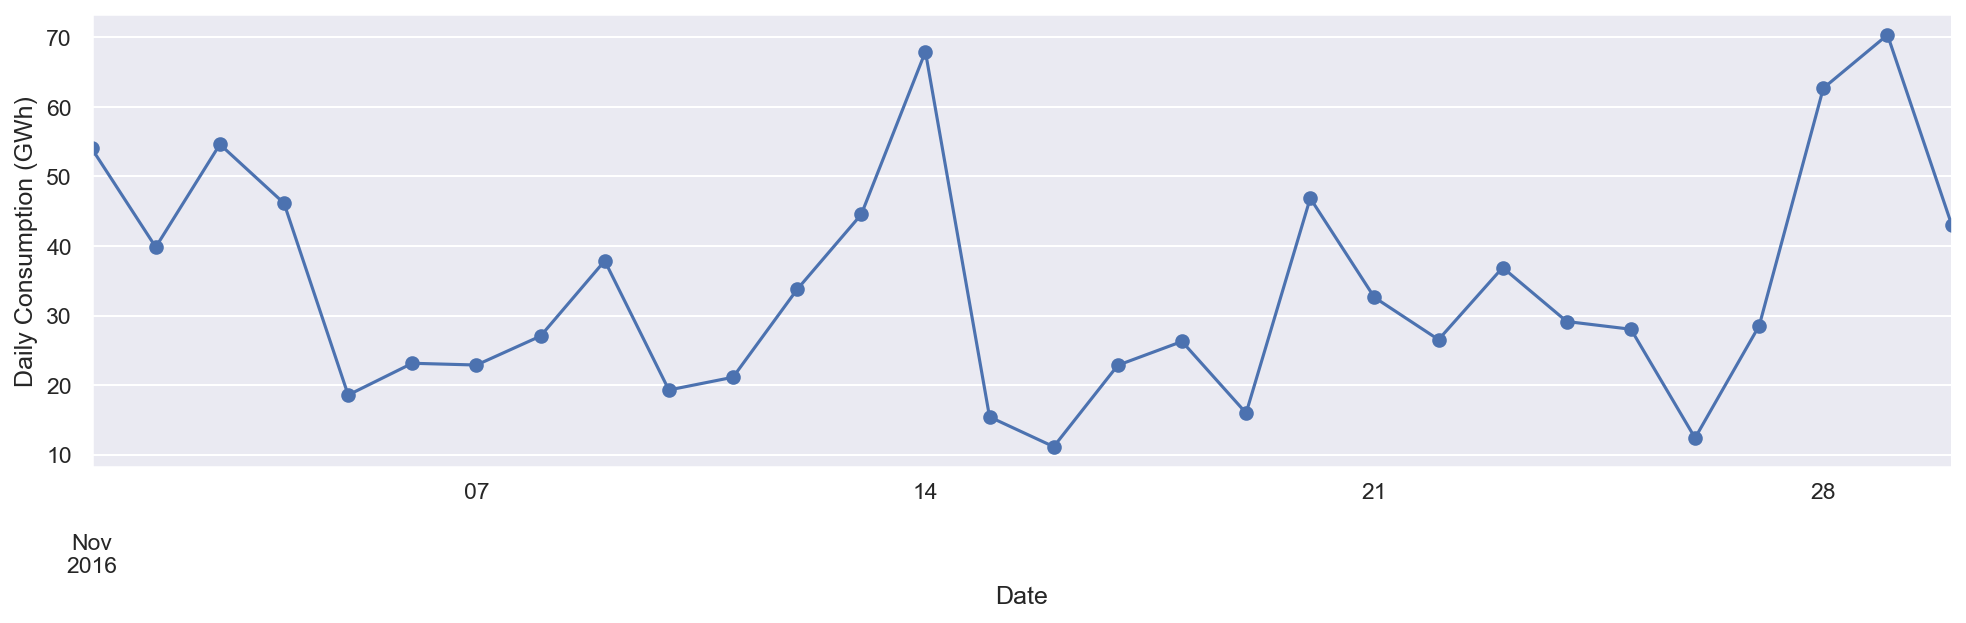

In [107]:
ax = df_power.loc['2016-11', 'Solar'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

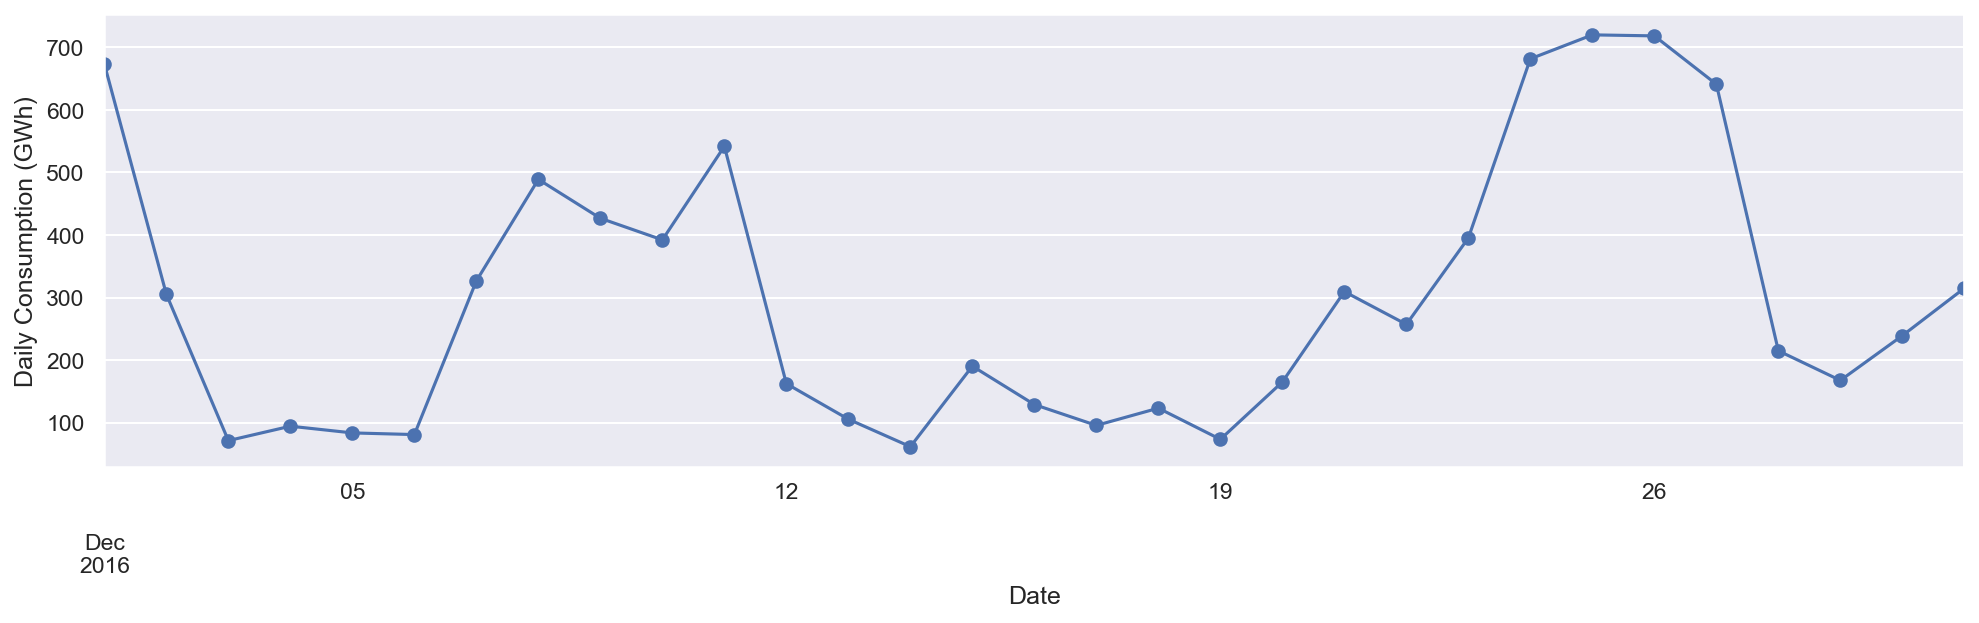

In [108]:
ax = df_power.loc['2016-12', 'Wind'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

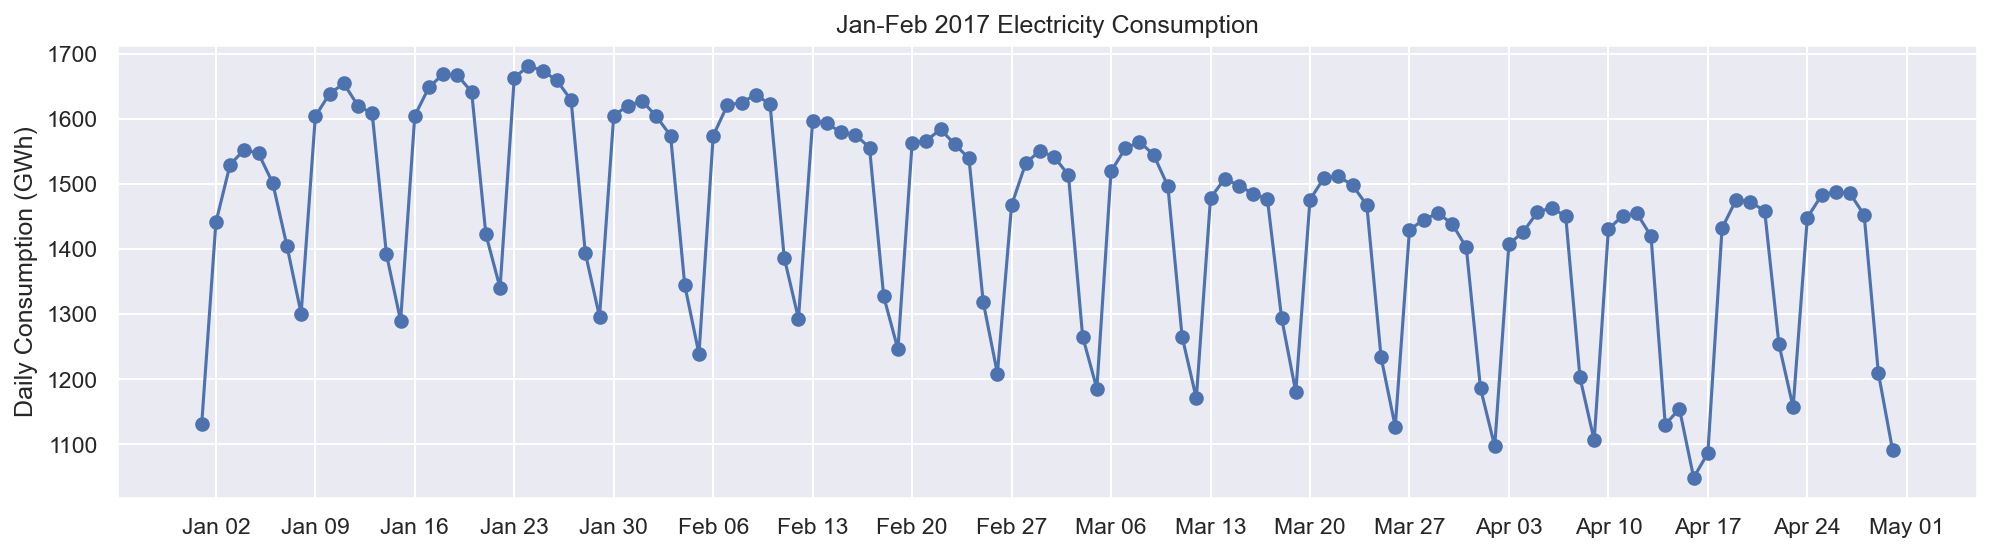

In [109]:
# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-01':'2017-04', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

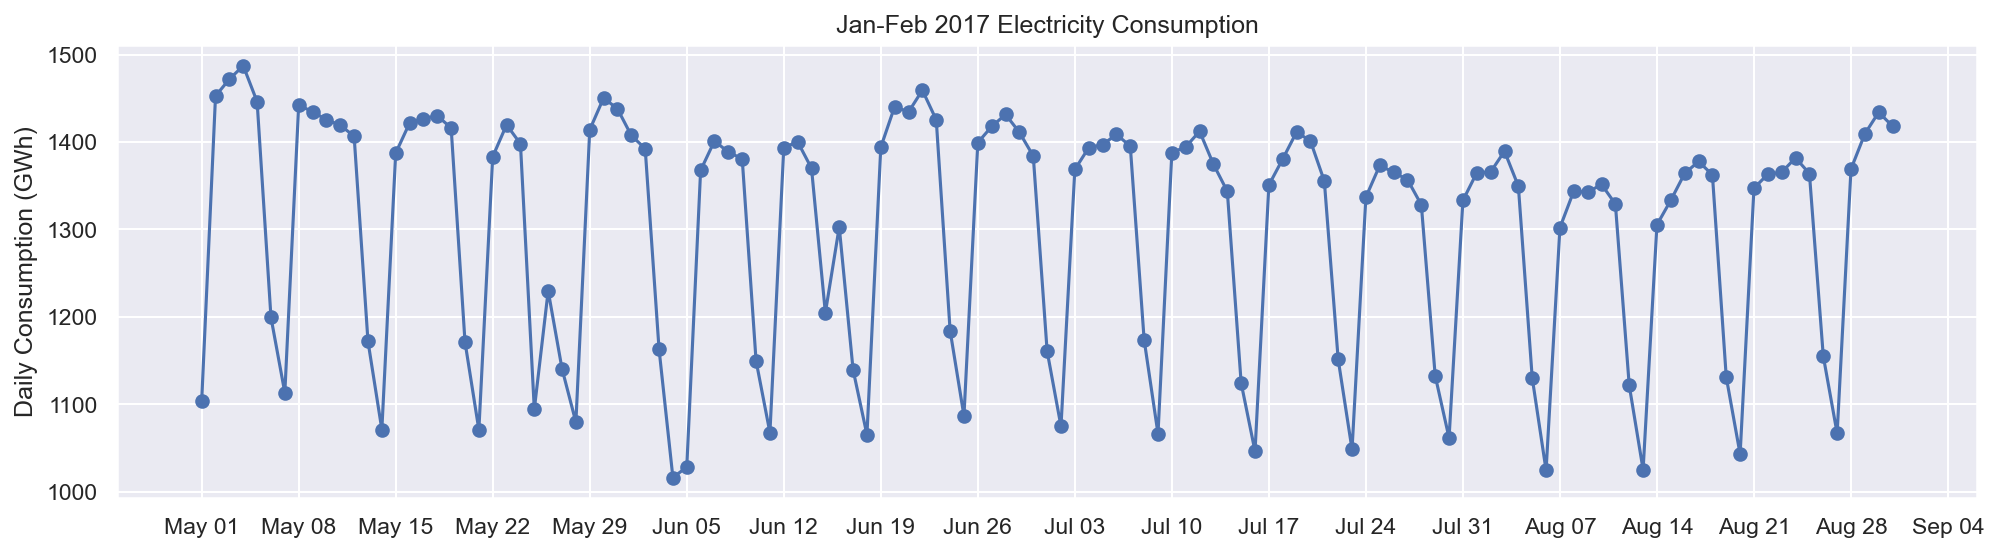

In [110]:
# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-05':'2017-08', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

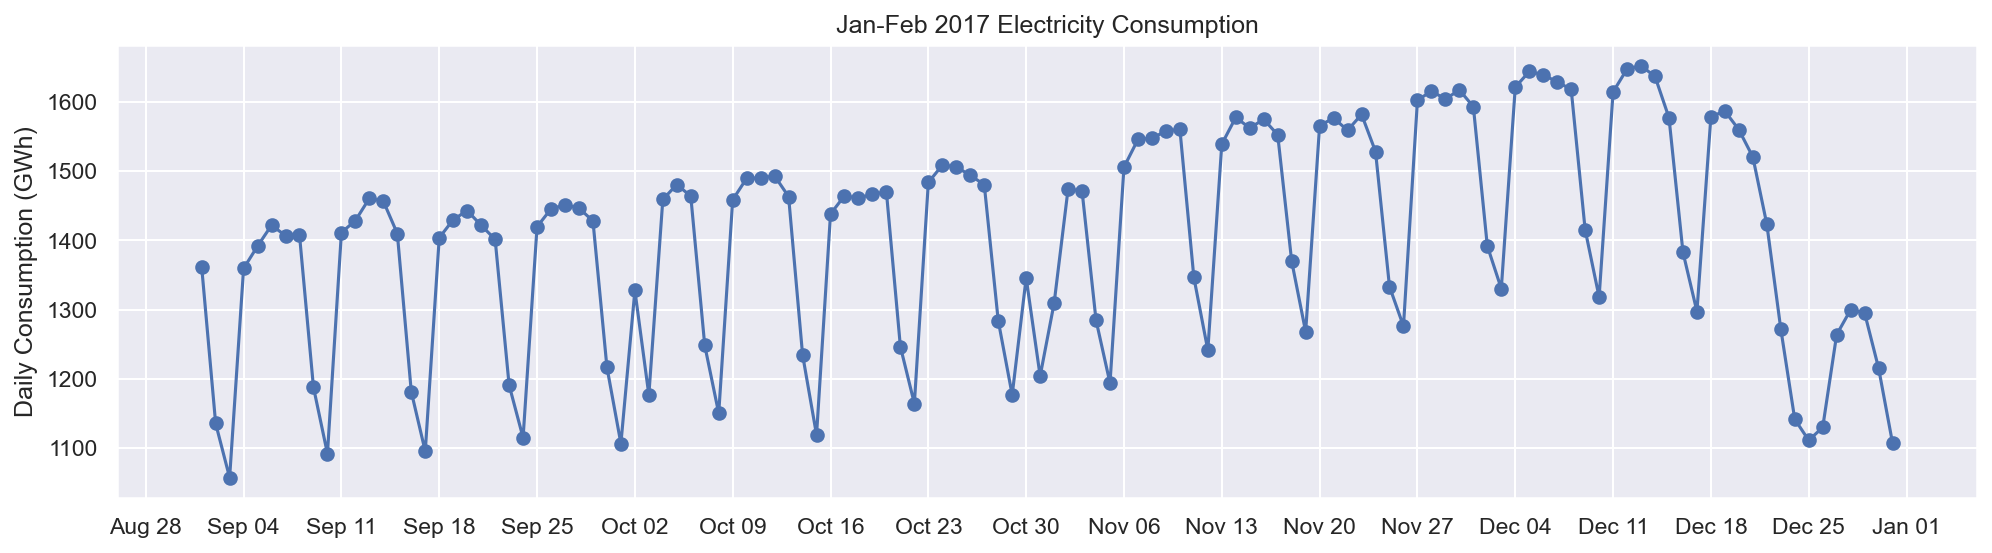

In [111]:
# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-09':'2017-12', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [112]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
2006-02-05,1501.403286,NaN,NaN,NaN
2006-02-12,1498.217143,NaN,NaN,NaN
2006-02-19,1446.507429,NaN,NaN,NaN
2006-02-26,1447.651429,NaN,NaN,NaN


In [113]:
start, end = '2016-01', '2016-06'

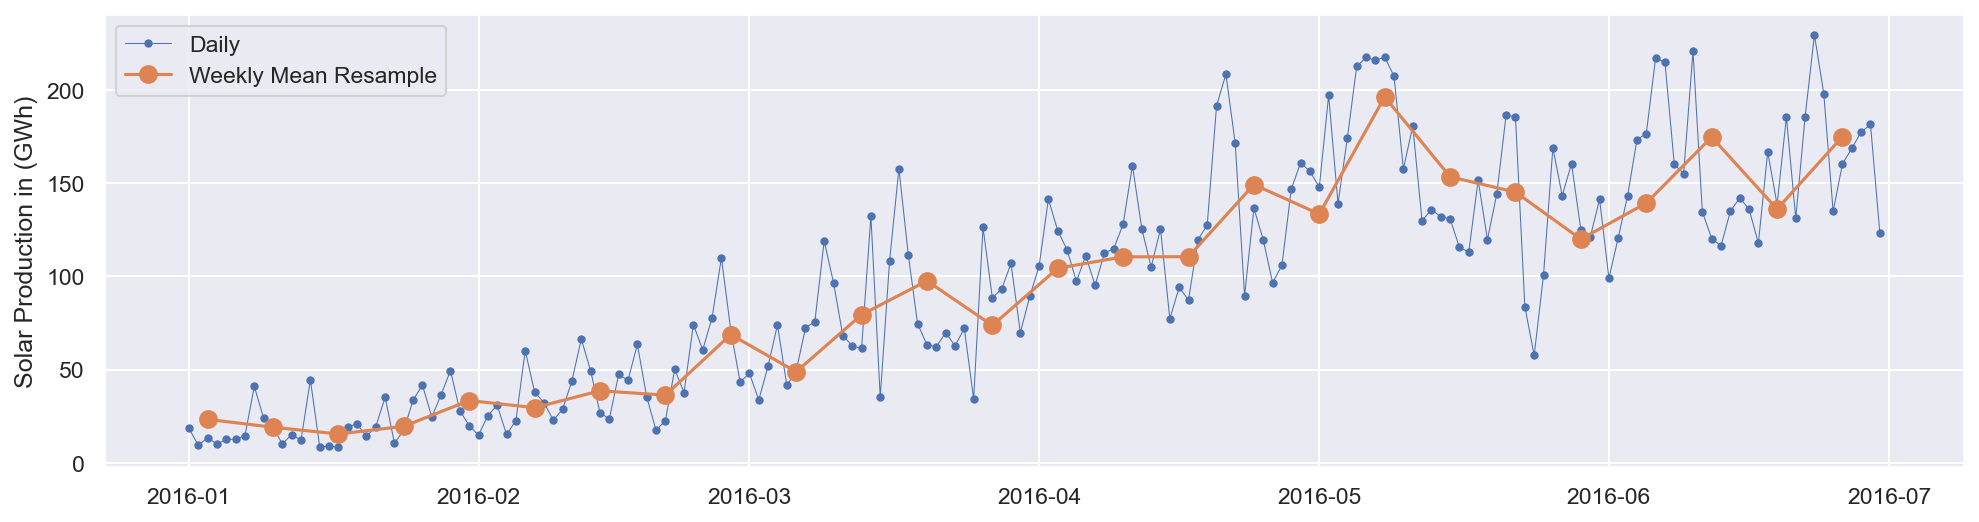

In [114]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();

In [115]:
start, end = '2016-06', '2016-12'

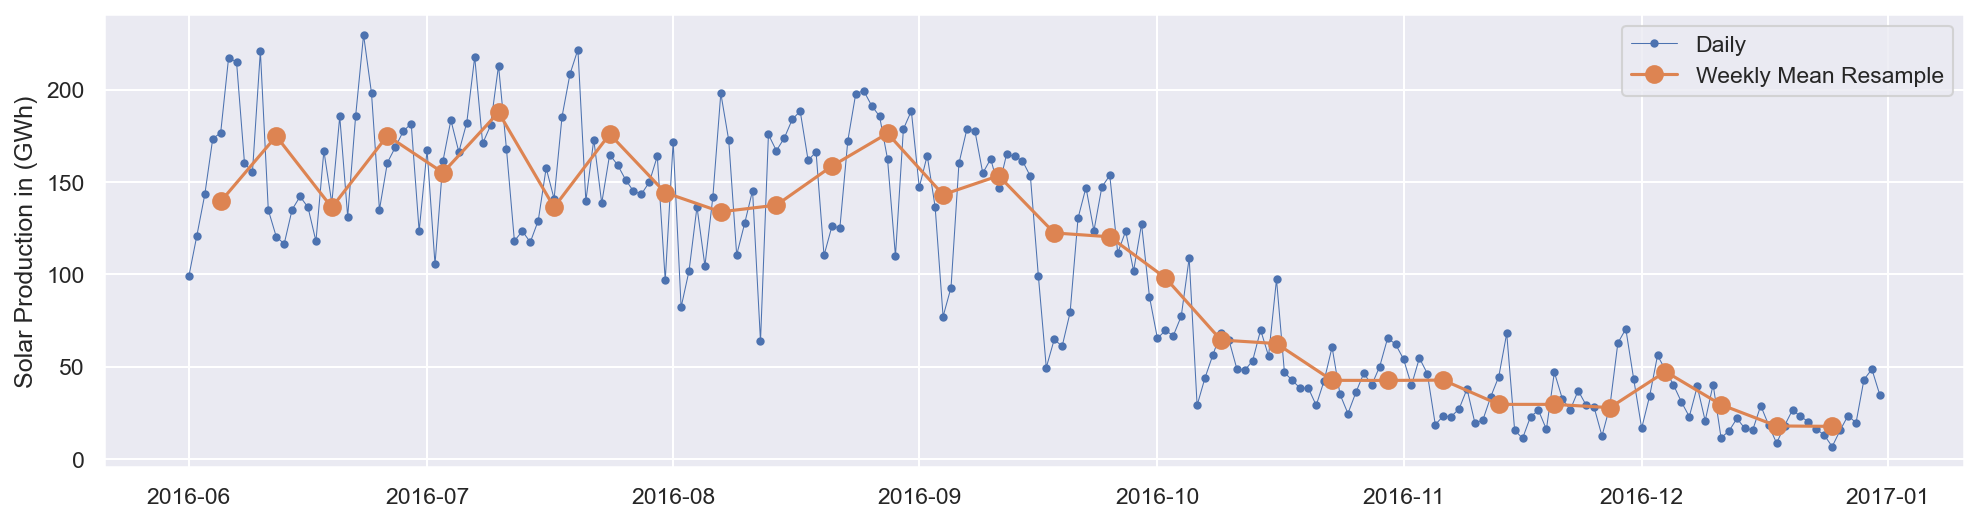

In [116]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();

In [117]:
start, end = '2017-01', '2017-06'

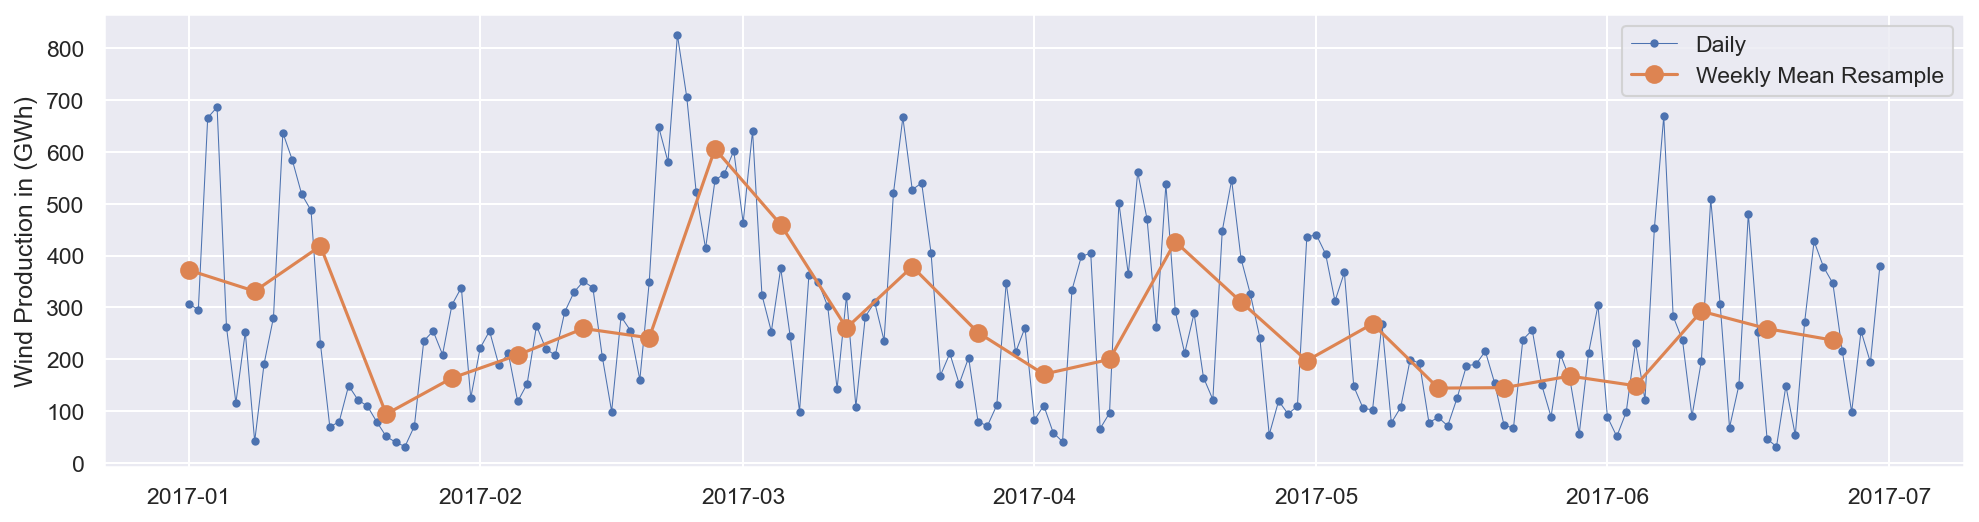

In [118]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Wind'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Wind'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Wind Production in (GWh)')
ax.legend();

In [119]:
start, end = '2017-06', '2017-12'

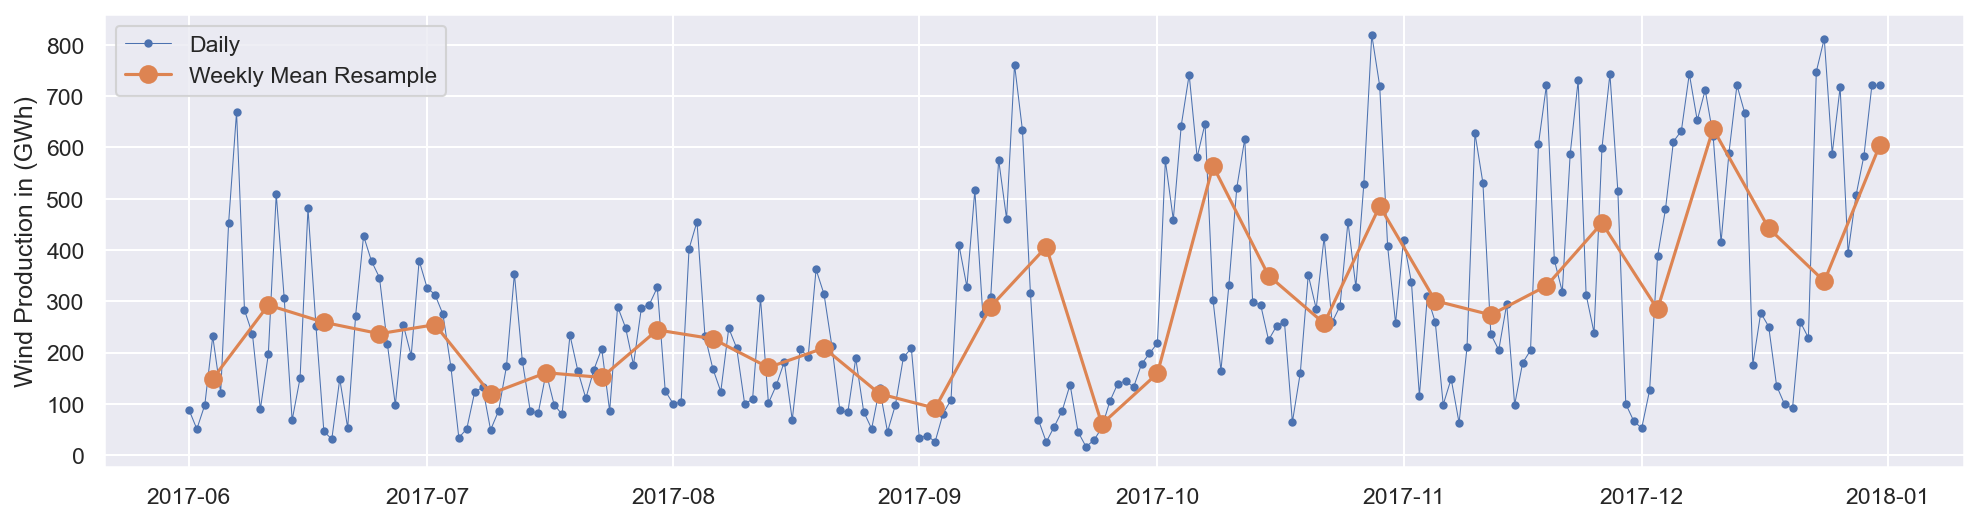

In [120]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Wind'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Wind'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Wind Production in (GWh)')
ax.legend();